In [1]:
import torch

In [2]:
import numpy as np
import pandas as pd

In [3]:
torch.tensor(4)

tensor(4)

In [4]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [5]:
ten1=torch.tensor([1,2,3,4])

In [6]:
ten1.shape #查看尺寸

torch.Size([4])

In [7]:
ten1.dtype #查看类型

torch.int64

## 求导机制

In [8]:
ten1.grad

In [9]:
print(ten1.grad)

None


In [10]:
x=torch.tensor([2.0],requires_grad=True)  #可以进行梯度回传
k=torch.tensor([5.0],requires_grad=True) 
print('反向传播前：',x.grad,k.grad)
y=k*x  #根据给定的数据，设计一个函数
y.backward()
print('反向传播后：',x.grad,k.grad)

反向传播前： None None
反向传播后： tensor([5.]) tensor([2.])


In [11]:
#y.backward()要清空，否则积累，会报错

In [12]:
y=k*x
y.backward

<bound method Tensor.backward of tensor([10.], grad_fn=<MulBackward0>)>

In [13]:
x=torch.randn(100)
y=8*x+9

In [14]:
#初始化参数
k=torch.tensor([0.0],requires_grad=True) 
b=torch.tensor([0.0],requires_grad=True) 
y_pre=k*x+b
def loss(y,y_pre):
    return torch.sum(torch.square(y-y_pre))/len(y)

err=loss(y,y_pre)

#反向梯度回传
err.backward()
#设置学习速率
lr=0.02
# 更新参数
k.data-=lr*k.grad   #k=k-lr*k.grad
b.data-=lr*b.grad
print(k.grad)
print(b.grad)
#更新梯度
k.grad.data.zero_()
b.grad.data.zero_()
print(k.grad)
print(b.grad)

tensor([-17.6262])
tensor([-19.5343])
tensor([0.])
tensor([0.])


## 循环迭代

In [15]:
#初始化参数
k=torch.tensor([0.0],requires_grad=True) 
b=torch.tensor([0.0],requires_grad=True) 
#设置学习速率
lr=0.02
Err=[]
for i in range(1000):
    y_pre=k*x+b
    err=loss(y,y_pre)
    err.backward()
    # 更新参数
    k.data-=lr*k.grad   #k=k-lr*k.grad
    b.data-=lr*b.grad
    k.grad.data.zero_()
    b.grad.data.zero_()
    Err.append(err.item())
    if i%100==0:
        print(i,'代：','k:',k.item(),'b=',b.item(),'误差值:',err.item())

0 代： k: 0.35252395272254944 b= 0.390685498714447 误差值: 158.40902709960938
100 代： k: 7.917397499084473 b= 8.896611213684082 误差值: 0.020891932770609856
200 代： k: 7.999180793762207 b= 8.99869155883789 误差值: 2.8252800348127494e-06
300 代： k: 7.999993801116943 b= 8.999980926513672 误差值: 4.73414751844814e-10
400 代： k: 7.999995708465576 b= 8.999988555908203 误差值: 1.5700379885075222e-10
500 代： k: 7.999995708465576 b= 8.999988555908203 误差值: 1.5700379885075222e-10
600 代： k: 7.999995708465576 b= 8.999988555908203 误差值: 1.5700379885075222e-10
700 代： k: 7.999995708465576 b= 8.999988555908203 误差值: 1.5700379885075222e-10
800 代： k: 7.999995708465576 b= 8.999988555908203 误差值: 1.5700379885075222e-10
900 代： k: 7.999995708465576 b= 8.999988555908203 误差值: 1.5700379885075222e-10


In [16]:
#pip install matplotlib

In [17]:
#pip install pandas

<function matplotlib.pyplot.show(close=None, block=None)>

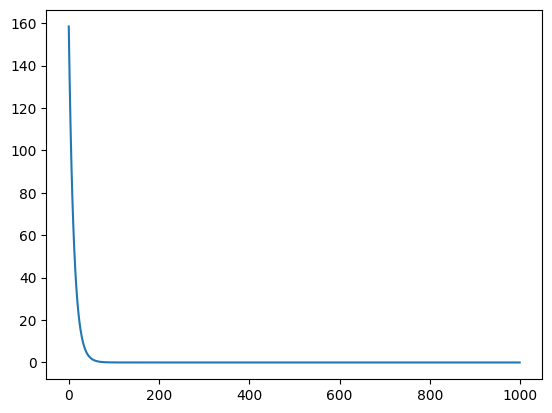

In [18]:
import matplotlib.pyplot as plt
plt.plot(Err)
plt.show

In [19]:
XBP=torch.randn((100,3))
YBP=torch.sum(XBP*torch.tensor([1,2,3])+4,axis=1)#设置线性模型
XBP.shape,YBP.shape

(torch.Size([100, 3]), torch.Size([100]))

In [20]:
from torch import nn
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')

## 模型搭建

In [21]:
BPmodel=nn.Sequential(
nn.Linear(3,100),   #输入神经元个数，隐层神经元个数
nn.Softmax(),
nn.Linear(100,1)    #隐层神经元个数，输出神经元个数
)
loss_mes=nn.MSELoss()
optimizer=optim.SGD(BPmodel.parameters(),lr=0.001)

## 模型训练

0 代 误差是： 19.206283569335938
50 代 误差是： 18.751859664916992
100 代 误差是： 18.3807373046875
150 代 误差是： 18.077640533447266
200 代 误差是： 17.830106735229492
250 代 误差是： 17.62794303894043
300 代 误差是： 17.462844848632812
350 代 误差是： 17.328006744384766
400 代 误差是： 17.21788215637207
450 代 误差是： 17.127944946289062
500 代 误差是： 17.054492950439453
550 代 误差是： 16.994504928588867
600 代 误差是： 16.94550895690918
650 代 误差是： 16.905498504638672
700 代 误差是： 16.872821807861328
750 代 误差是： 16.846134185791016
800 代 误差是： 16.8243350982666
850 代 误差是： 16.806533813476562
900 代 误差是： 16.79199981689453
950 代 误差是： 16.78013038635254
1000 代 误差是： 16.77043342590332


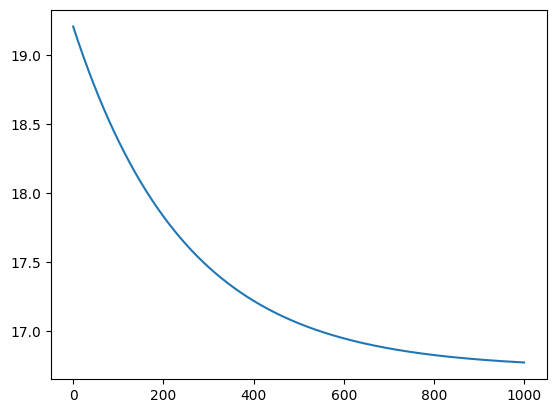

In [23]:
loss_data=[]
for i in range(1001):
    output=BPmodel(XBP)#计算预测值
    loss=loss_mes(output,YBP)  #计算误差
    optimizer.zero_grad()#清空梯度
    loss.backward()#误差回传
    optimizer.step()#更新参数
    if i % 50==0:
        print(i,'代','误差是：',loss.item())
    loss_data.append(loss.item())
plt.plot(loss_data)
plt.show()
    

## 模型预测

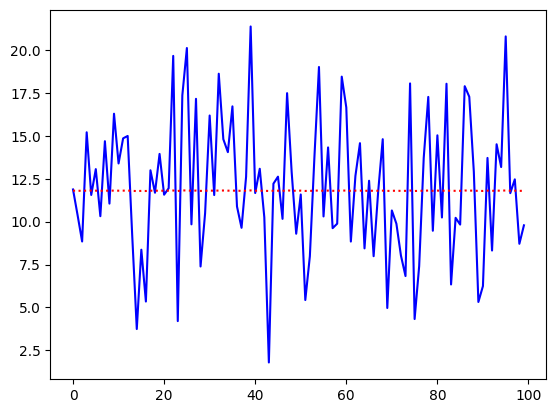

In [24]:
output=BPmodel(XBP)
plt.figure()
plt.plot(YBP.numpy(),'b-')
plt.plot(output.detach().numpy(),'r:')
plt.show()